# Improve convergence of nmf.fit()

Check if the current convergence criterion, which checks the *average* improvement in log-likelihood per observation, prevents certain samples in higher order NMF models from converging.

## Setup

In [1]:
import os
while not os.path.exists('test_data'):
    os.chdir('..')
os.getcwd()

'/Users/yl3/github/genomics/nmflib'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

import nmflib.nmf

In [9]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [17]:
sns.set()

## Generate synthetic data

In [6]:
def load_syn_data(r):  # r in PCAWG-7 data seems to be around 70
    datadir = 'test_data'
    W = pd.read_csv(datadir + '/ground.truth.syn.sigs.csv.gz',
                    index_col=[0, 1],
                    header=0)
    H = pd.read_csv(datadir +
                    '/ground.truth.syn.exposures.csv.gz',
                    index_col=0,
                    header=0)
    
    # Compute S, O and X_exp.
    WH = W.dot(H)
    O = scipy.stats.uniform.rvs(0, 20, WH.shape)
    S = scipy.stats.uniform.rvs(0.05, 1 - 0.05, WH.shape)
    
    # Simulate random counts.
    p = nmflib.nmf._nb_p((WH + O) * S, r)
    X_obs = scipy.stats.nbinom.rvs(r, p)
    return X_obs, W, H, S, O, r

In [7]:
np.random.seed(0)
X_obs, W_true, H_true, S_true, O_true, r_true = load_syn_data(r=70)
X_obs = pd.DataFrame(X_obs, index=W_true.index, columns=H_true.columns)

## Fit rank 21 model with default (element-wise) tolerance and absolute tolerance.

In [10]:
%%time

W, H, r, n_iter, errors = nmflib.nmf.fit(X_obs, W_true.shape[1], S_true,
                                         O_true, True, max_iter=2000)

CPU times: user 48.5 s, sys: 3.54 s, total: 52 s
Wall time: 36.6 s


In [11]:
%%time

W_conv, H_conv, r_conv, n_iter_conv, errors_conv = \
    nmflib.nmf.fit(X_obs, W_true.shape[1], S_true, O_true, True,
                   max_iter=20000, abstol=1e-4 / np.prod(X_obs.shape),
                   verbose=True)

INFO:root:Updated r to 2.6127437785289036
INFO:root:Updated r to 2.862852509640108
INFO:root:Updated r to 3.059847482349707
INFO:root:Updated r to 3.8788849539607226
INFO:root:Iteration 10 after 3.402 seconds, error: -147549354.03459063
INFO:root:Updated r to 7.5044165687628634
INFO:root:Updated r to 14.065415349550864
INFO:root:Iteration 20 after 4.615 seconds, error: -147651046.9782948
INFO:root:Updated r to 26.25261629313622
INFO:root:Iteration 30 after 5.314 seconds, error: -147694868.5103939
INFO:root:Iteration 40 after 5.505 seconds, error: -147716523.95743978
INFO:root:Updated r to 44.53190364707474
INFO:root:Iteration 50 after 6.287 seconds, error: -147732664.77765685
INFO:root:Iteration 60 after 6.467 seconds, error: -147739546.7956986
INFO:root:Iteration 70 after 6.645 seconds, error: -147743779.5108006
INFO:root:Updated r to 59.99087349956034
INFO:root:Iteration 80 after 7.388 seconds, error: -147748800.21626243
INFO:root:Iteration 90 after 7.608 seconds, error: -147751528.2

INFO:root:Iteration 1060 after 26.964 seconds, error: -147774842.59416354
INFO:root:Iteration 1070 after 27.122 seconds, error: -147774860.80188084
INFO:root:Iteration 1080 after 27.303 seconds, error: -147774878.43154263
INFO:root:Iteration 1090 after 27.507 seconds, error: -147774895.56226602
INFO:root:Iteration 1100 after 27.665 seconds, error: -147774912.3394927
INFO:root:Iteration 1110 after 27.824 seconds, error: -147774928.93436843
INFO:root:Iteration 1120 after 27.995 seconds, error: -147774945.61564207
INFO:root:Iteration 1130 after 28.154 seconds, error: -147774962.8528877
INFO:root:Iteration 1140 after 28.314 seconds, error: -147774980.46728045
INFO:root:Iteration 1150 after 28.473 seconds, error: -147774997.81608057
INFO:root:Iteration 1160 after 28.630 seconds, error: -147775014.64822456
INFO:root:Iteration 1170 after 28.787 seconds, error: -147775030.6820931
INFO:root:Iteration 1180 after 28.948 seconds, error: -147775045.9705315
INFO:root:Iteration 1190 after 29.111 seco

INFO:root:Iteration 2170 after 45.736 seconds, error: -147775739.88800573
INFO:root:Iteration 2180 after 45.893 seconds, error: -147775742.59770584
INFO:root:Iteration 2190 after 46.054 seconds, error: -147775745.3140105
INFO:root:Iteration 2200 after 46.212 seconds, error: -147775747.98257652
INFO:root:Iteration 2210 after 46.372 seconds, error: -147775750.59000254
INFO:root:Iteration 2220 after 46.528 seconds, error: -147775753.17393175
INFO:root:Iteration 2230 after 46.686 seconds, error: -147775755.75694066
INFO:root:Iteration 2240 after 46.845 seconds, error: -147775758.35578427
INFO:root:Iteration 2250 after 47.024 seconds, error: -147775760.98510998
INFO:root:Iteration 2260 after 47.182 seconds, error: -147775763.6525449
INFO:root:Iteration 2270 after 47.363 seconds, error: -147775766.3514363
INFO:root:Iteration 2280 after 47.579 seconds, error: -147775769.05832022
INFO:root:Iteration 2290 after 47.742 seconds, error: -147775771.74177274
INFO:root:Iteration 2300 after 47.909 sec

INFO:root:Iteration 3280 after 66.868 seconds, error: -147775951.512046
INFO:root:Iteration 3290 after 67.095 seconds, error: -147775952.76350576
INFO:root:Iteration 3300 after 67.341 seconds, error: -147775953.9955784
INFO:root:Iteration 3310 after 67.509 seconds, error: -147775955.2130077
INFO:root:Iteration 3320 after 67.671 seconds, error: -147775956.42210734
INFO:root:Iteration 3330 after 67.833 seconds, error: -147775957.62677038
INFO:root:Iteration 3340 after 68.013 seconds, error: -147775958.82882383
INFO:root:Iteration 3350 after 68.220 seconds, error: -147775960.02918613
INFO:root:Iteration 3360 after 68.400 seconds, error: -147775961.22832036
INFO:root:Iteration 3370 after 68.582 seconds, error: -147775962.42632636
INFO:root:Iteration 3380 after 68.774 seconds, error: -147775963.6230391
INFO:root:Iteration 3390 after 69.017 seconds, error: -147775964.81822437
INFO:root:Iteration 3400 after 69.221 seconds, error: -147775966.0117745
INFO:root:Iteration 3410 after 69.387 second

INFO:root:Iteration 4400 after 88.335 seconds, error: -147776067.33898264
INFO:root:Iteration 4410 after 88.509 seconds, error: -147776068.12353817
INFO:root:Iteration 4420 after 88.675 seconds, error: -147776068.9022603
INFO:root:Updated r to 120.19795147516676
INFO:root:Iteration 4430 after 89.027 seconds, error: -147776069.8117562
INFO:root:Iteration 4440 after 89.186 seconds, error: -147776070.58509842
INFO:root:Iteration 4450 after 89.349 seconds, error: -147776071.35449818
INFO:root:Iteration 4460 after 89.509 seconds, error: -147776072.11813614
INFO:root:Iteration 4470 after 89.665 seconds, error: -147776072.87396553
INFO:root:Iteration 4480 after 89.830 seconds, error: -147776073.62192452
INFO:root:Iteration 4490 after 89.991 seconds, error: -147776074.36372238
INFO:root:Iteration 4500 after 90.150 seconds, error: -147776075.10129663
INFO:root:Iteration 4510 after 90.310 seconds, error: -147776075.836009
INFO:root:Iteration 4520 after 90.485 seconds, error: -147776076.56860086


INFO:root:Iteration 5510 after 108.533 seconds, error: -147776140.77198622
INFO:root:Iteration 5520 after 108.704 seconds, error: -147776141.30367178
INFO:root:Iteration 5530 after 108.870 seconds, error: -147776141.82703048
INFO:root:Iteration 5540 after 109.056 seconds, error: -147776142.34404582
INFO:root:Iteration 5550 after 109.252 seconds, error: -147776142.85651386
INFO:root:Iteration 5560 after 109.431 seconds, error: -147776143.36613122
INFO:root:Iteration 5570 after 109.623 seconds, error: -147776143.87454498
INFO:root:Iteration 5580 after 109.828 seconds, error: -147776144.38336372
INFO:root:Iteration 5590 after 110.030 seconds, error: -147776144.89411864
INFO:root:Iteration 5600 after 110.194 seconds, error: -147776145.40815783
INFO:root:Iteration 5610 after 110.396 seconds, error: -147776145.92646843
INFO:root:Iteration 5620 after 110.614 seconds, error: -147776146.4494539
INFO:root:Iteration 5630 after 110.795 seconds, error: -147776146.97674775
INFO:root:Iteration 5640 a

INFO:root:Iteration 6610 after 129.973 seconds, error: -147776192.51425782
INFO:root:Iteration 6620 after 130.221 seconds, error: -147776192.91522953
INFO:root:Iteration 6630 after 130.394 seconds, error: -147776193.3174361
INFO:root:Updated r to 120.52052597492406
INFO:root:Iteration 6640 after 130.798 seconds, error: -147776193.79037997
INFO:root:Iteration 6650 after 131.013 seconds, error: -147776194.1947123
INFO:root:Iteration 6660 after 131.266 seconds, error: -147776194.59764192
INFO:root:Iteration 6670 after 131.461 seconds, error: -147776194.99927405
INFO:root:Iteration 6680 after 131.645 seconds, error: -147776195.3993282
INFO:root:Iteration 6690 after 131.840 seconds, error: -147776195.7976591
INFO:root:Iteration 6700 after 132.036 seconds, error: -147776196.1943014
INFO:root:Iteration 6710 after 132.221 seconds, error: -147776196.5894736
INFO:root:Iteration 6720 after 132.411 seconds, error: -147776196.98357314
INFO:root:Iteration 6730 after 132.582 seconds, error: -14777619

INFO:root:Iteration 7710 after 153.432 seconds, error: -147776227.6124643
INFO:root:Iteration 7720 after 153.597 seconds, error: -147776227.89658254
INFO:root:Iteration 7730 after 153.764 seconds, error: -147776228.1876625
INFO:root:Iteration 7740 after 153.929 seconds, error: -147776228.48773482
INFO:root:Iteration 7750 after 154.097 seconds, error: -147776228.79959446
INFO:root:Iteration 7760 after 154.263 seconds, error: -147776229.1253248
INFO:root:Iteration 7770 after 154.425 seconds, error: -147776229.46247756
INFO:root:Iteration 7780 after 154.588 seconds, error: -147776229.80188927
INFO:root:Iteration 7790 after 154.752 seconds, error: -147776230.13403088
INFO:root:Iteration 7800 after 154.917 seconds, error: -147776230.45700097
INFO:root:Iteration 7810 after 155.097 seconds, error: -147776230.7745453
INFO:root:Iteration 7820 after 155.263 seconds, error: -147776231.09046796
INFO:root:Iteration 7830 after 155.509 seconds, error: -147776231.4068634
INFO:root:Iteration 7840 after

INFO:root:Iteration 8810 after 175.438 seconds, error: -147776260.07549927
INFO:root:Iteration 8820 after 175.604 seconds, error: -147776260.3324315
INFO:root:Iteration 8830 after 175.783 seconds, error: -147776260.58966225
INFO:root:Iteration 8840 after 175.988 seconds, error: -147776260.8476157
INFO:root:Iteration 8850 after 176.176 seconds, error: -147776261.10651454
INFO:root:Iteration 8860 after 176.396 seconds, error: -147776261.36631656
INFO:root:Iteration 8870 after 176.580 seconds, error: -147776261.62666696
INFO:root:Iteration 8880 after 176.766 seconds, error: -147776261.88689598
INFO:root:Iteration 8890 after 176.965 seconds, error: -147776262.146089
INFO:root:Iteration 8900 after 177.190 seconds, error: -147776262.40323585
INFO:root:Iteration 8910 after 177.366 seconds, error: -147776262.65742958
INFO:root:Iteration 8920 after 177.585 seconds, error: -147776262.9080524
INFO:root:Iteration 8930 after 177.769 seconds, error: -147776263.15488768
INFO:root:Iteration 8940 after

INFO:root:Iteration 9910 after 196.211 seconds, error: -147776293.03197542
INFO:root:Iteration 9920 after 196.384 seconds, error: -147776293.40614742
INFO:root:Iteration 9930 after 196.550 seconds, error: -147776293.77296528
INFO:root:Iteration 9940 after 196.717 seconds, error: -147776294.13324854
INFO:root:Iteration 9950 after 196.889 seconds, error: -147776294.48753962
INFO:root:Iteration 9960 after 197.065 seconds, error: -147776294.83665594
INFO:root:Updated r to 120.86949673636168
INFO:root:Iteration 9970 after 197.466 seconds, error: -147776295.2643245
INFO:root:Iteration 9980 after 197.654 seconds, error: -147776295.60772857
INFO:root:Iteration 9990 after 197.824 seconds, error: -147776295.9488908
INFO:root:Iteration 10000 after 197.992 seconds, error: -147776296.28858596
INFO:root:Iteration 10010 after 198.166 seconds, error: -147776296.62718546
INFO:root:Iteration 10020 after 198.335 seconds, error: -147776296.96508262
INFO:root:Iteration 10030 after 198.503 seconds, error: -

INFO:root:Iteration 10990 after 215.399 seconds, error: -147776333.8344453
INFO:root:Iteration 11000 after 215.567 seconds, error: -147776334.23218083
INFO:root:Iteration 11010 after 215.736 seconds, error: -147776334.62983018
INFO:root:Iteration 11020 after 215.909 seconds, error: -147776335.02751338
INFO:root:Iteration 11030 after 216.081 seconds, error: -147776335.42538315
INFO:root:Iteration 11040 after 216.250 seconds, error: -147776335.82368743
INFO:root:Iteration 11050 after 216.425 seconds, error: -147776336.22280994
INFO:root:Iteration 11060 after 216.598 seconds, error: -147776336.62328723
INFO:root:Iteration 11070 after 216.772 seconds, error: -147776337.02580678
INFO:root:Iteration 11080 after 216.941 seconds, error: -147776337.43119097
INFO:root:Iteration 11090 after 217.141 seconds, error: -147776337.84037328
INFO:root:Iteration 11100 after 217.344 seconds, error: -147776338.25436848
INFO:root:Iteration 11110 after 217.540 seconds, error: -147776338.67423522
INFO:root:Ite

INFO:root:Iteration 12080 after 234.957 seconds, error: -147776391.55729932
INFO:root:Iteration 12090 after 235.142 seconds, error: -147776392.24025238
INFO:root:Iteration 12100 after 235.323 seconds, error: -147776392.9363168
INFO:root:Iteration 12110 after 235.501 seconds, error: -147776393.64575687
INFO:root:Iteration 12120 after 235.678 seconds, error: -147776394.36813062
INFO:root:Iteration 12130 after 235.860 seconds, error: -147776395.1020825
INFO:root:Iteration 12140 after 236.041 seconds, error: -147776395.84532064
INFO:root:Iteration 12150 after 236.218 seconds, error: -147776396.59488356
INFO:root:Iteration 12160 after 236.401 seconds, error: -147776397.34766966
INFO:root:Iteration 12170 after 236.587 seconds, error: -147776398.1010356
INFO:root:Iteration 12180 after 236.770 seconds, error: -147776398.85320875
INFO:root:Iteration 12190 after 236.949 seconds, error: -147776399.60337588
INFO:root:Iteration 12200 after 237.133 seconds, error: -147776400.35149682
INFO:root:Itera

INFO:root:Iteration 13170 after 256.646 seconds, error: -147776495.88882232
INFO:root:Iteration 13180 after 256.890 seconds, error: -147776497.21477506
INFO:root:Iteration 13190 after 257.104 seconds, error: -147776498.55142167
INFO:root:Iteration 13200 after 257.290 seconds, error: -147776499.896848
INFO:root:Iteration 13210 after 257.475 seconds, error: -147776501.24964398
INFO:root:Iteration 13220 after 257.683 seconds, error: -147776502.60920644
INFO:root:Iteration 13230 after 257.945 seconds, error: -147776503.97577938
INFO:root:Iteration 13240 after 258.143 seconds, error: -147776505.3502757
INFO:root:Iteration 13250 after 258.341 seconds, error: -147776506.73400316
INFO:root:Iteration 13260 after 258.558 seconds, error: -147776508.12840992
INFO:root:Iteration 13270 after 258.797 seconds, error: -147776509.53489912
INFO:root:Iteration 13280 after 258.993 seconds, error: -147776510.95470428
INFO:root:Iteration 13290 after 259.178 seconds, error: -147776512.388794
INFO:root:Iterati

INFO:root:Iteration 14260 after 278.664 seconds, error: -147776714.0933102
INFO:root:Iteration 14270 after 278.886 seconds, error: -147776717.49727017
INFO:root:Iteration 14280 after 279.123 seconds, error: -147776720.9940965
INFO:root:Iteration 14290 after 279.325 seconds, error: -147776724.58066422
INFO:root:Iteration 14300 after 279.539 seconds, error: -147776728.2496035
INFO:root:Iteration 14310 after 279.747 seconds, error: -147776731.98612043
INFO:root:Iteration 14320 after 279.993 seconds, error: -147776735.76599872
INFO:root:Iteration 14330 after 280.179 seconds, error: -147776739.55800304
INFO:root:Iteration 14340 after 280.366 seconds, error: -147776743.3318275
INFO:root:Iteration 14350 after 280.556 seconds, error: -147776747.06774685
INFO:root:Iteration 14360 after 280.789 seconds, error: -147776750.76164287
INFO:root:Iteration 14370 after 281.023 seconds, error: -147776754.4225037
INFO:root:Iteration 14380 after 281.239 seconds, error: -147776758.06427485
INFO:root:Iterati

INFO:root:Iteration 15340 after 303.690 seconds, error: -147776932.4224424
INFO:root:Iteration 15350 after 303.919 seconds, error: -147776933.16872117
INFO:root:Iteration 15360 after 304.104 seconds, error: -147776933.92323056
INFO:root:Iteration 15370 after 304.319 seconds, error: -147776934.68707213
INFO:root:Iteration 15380 after 304.508 seconds, error: -147776935.45450956
INFO:root:Iteration 15390 after 304.693 seconds, error: -147776936.21402237
INFO:root:Iteration 15400 after 304.878 seconds, error: -147776936.9534051
INFO:root:Iteration 15410 after 305.066 seconds, error: -147776937.66440547
INFO:root:Iteration 15420 after 305.248 seconds, error: -147776938.34402078
INFO:root:Iteration 15430 after 305.433 seconds, error: -147776938.99283603
INFO:root:Iteration 15440 after 305.617 seconds, error: -147776939.61263674
INFO:root:Iteration 15450 after 305.817 seconds, error: -147776940.2054234
INFO:root:Iteration 15460 after 306.049 seconds, error: -147776940.77398622
INFO:root:Itera

INFO:root:Iteration 16430 after 327.836 seconds, error: -147776995.34816277
INFO:root:Iteration 16440 after 328.066 seconds, error: -147776995.6060204
INFO:root:Iteration 16450 after 328.322 seconds, error: -147776995.84817582
INFO:root:Iteration 16460 after 328.569 seconds, error: -147776996.080132
INFO:root:Iteration 16470 after 328.829 seconds, error: -147776996.304197
INFO:root:Iteration 16480 after 329.036 seconds, error: -147776996.52177522
INFO:root:Iteration 16490 after 329.290 seconds, error: -147776996.73395327
INFO:root:Iteration 16500 after 329.503 seconds, error: -147776996.9416302
INFO:root:Iteration 16510 after 329.718 seconds, error: -147776997.14553872
INFO:root:Iteration 16520 after 329.951 seconds, error: -147776997.34625316
INFO:root:Iteration 16530 after 330.192 seconds, error: -147776997.54420742
INFO:root:Iteration 16540 after 330.391 seconds, error: -147776997.73972446
INFO:root:Iteration 16550 after 330.624 seconds, error: -147776997.93305203
INFO:root:Iteratio

INFO:root:Iteration 17520 after 351.959 seconds, error: -147777029.98212582
INFO:root:Iteration 17530 after 352.160 seconds, error: -147777030.3194451
INFO:root:Iteration 17540 after 352.391 seconds, error: -147777030.68946743
INFO:root:Iteration 17550 after 352.618 seconds, error: -147777031.1037409
INFO:root:Iteration 17560 after 352.820 seconds, error: -147777031.57674474
INFO:root:Iteration 17570 after 353.023 seconds, error: -147777032.12563857
INFO:root:Iteration 17580 after 353.224 seconds, error: -147777032.76855317
INFO:root:Iteration 17590 after 353.428 seconds, error: -147777033.52088368
INFO:root:Iteration 17600 after 353.627 seconds, error: -147777034.390491
INFO:root:Iteration 17610 after 353.829 seconds, error: -147777035.37385732
INFO:root:Iteration 17620 after 354.031 seconds, error: -147777036.44872156
INFO:root:Iteration 17630 after 354.230 seconds, error: -147777037.5578705
INFO:root:Iteration 17640 after 354.433 seconds, error: -147777038.63475487
INFO:root:Iterati

INFO:root:Iteration 18610 after 376.350 seconds, error: -147777243.5359719
INFO:root:Iteration 18620 after 376.548 seconds, error: -147777245.2597349
INFO:root:Iteration 18630 after 376.852 seconds, error: -147777247.08720654
INFO:root:Iteration 18640 after 377.146 seconds, error: -147777249.02743834
INFO:root:Iteration 18650 after 377.463 seconds, error: -147777251.08796227
INFO:root:Iteration 18660 after 377.679 seconds, error: -147777253.2734269
INFO:root:Iteration 18670 after 377.917 seconds, error: -147777255.58435857
INFO:root:Iteration 18680 after 378.178 seconds, error: -147777258.01676133
INFO:root:Iteration 18690 after 378.430 seconds, error: -147777260.5630888
INFO:root:Iteration 18700 after 378.642 seconds, error: -147777263.21429592
INFO:root:Iteration 18710 after 378.858 seconds, error: -147777265.96180934
INFO:root:Iteration 18720 after 379.122 seconds, error: -147777268.7983083
INFO:root:Iteration 18730 after 379.352 seconds, error: -147777271.7171627
INFO:root:Iteratio

INFO:root:Iteration 19700 after 403.796 seconds, error: -147777370.10159323
INFO:root:Iteration 19710 after 404.037 seconds, error: -147777370.33434886
INFO:root:Iteration 19720 after 404.329 seconds, error: -147777370.5863679
INFO:root:Iteration 19730 after 404.598 seconds, error: -147777370.86367854
INFO:root:Iteration 19740 after 404.924 seconds, error: -147777371.17240396
INFO:root:Iteration 19750 after 405.205 seconds, error: -147777371.51747695
INFO:root:Iteration 19760 after 405.475 seconds, error: -147777371.90059575
INFO:root:Iteration 19770 after 405.761 seconds, error: -147777372.31785536
INFO:root:Iteration 19780 after 406.001 seconds, error: -147777372.7582399
INFO:root:Iteration 19790 after 406.239 seconds, error: -147777373.20454288
INFO:root:Iteration 19800 after 406.502 seconds, error: -147777373.63735902
INFO:root:Iteration 19810 after 406.740 seconds, error: -147777374.04063508
INFO:root:Iteration 19820 after 406.989 seconds, error: -147777374.4057766
INFO:root:Itera

CPU times: user 11min 46s, sys: 55.6 s, total: 12min 41s
Wall time: 6min 51s


In [13]:
print(f"Error with original convergence tolerance: {errors[-1]}")
print(f"Error with absolute convergence tolerance: {errors_conv[-1]}")
print("Difference: {}".format(errors_conv[-1] - errors[-1]))

Error with original convergence tolerance: -147773750.06549156
Error with absolute convergence tolerance: -147777380.26713982
Difference: -3630.2016482651234


**With the original convergence criterion, the model is far from converged!**

## Compare per-sample fit between the old and new convergence criteria

In [15]:
old_sample_logliks = np.sum(
    nmflib.nmf.loglik(X_obs, r=r, W=W, H=H, S=S_true, O=O_true),
    0)
old_sample_logliks.shape

(2700,)

In [25]:
new_sample_logliks = np.sum(
    nmflib.nmf.loglik(X_obs, r=r_conv, W=W_conv, H=H_conv, S=S_true, O=O_true),
    0)
new_sample_logliks.shape

(2700,)

[]

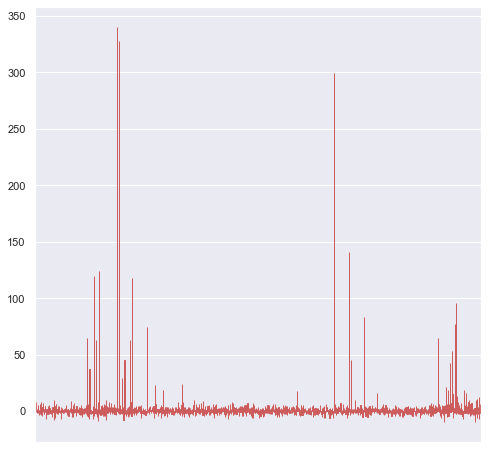

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(np.arange(len(new_sample_logliks)),
            (new_sample_logliks - old_sample_logliks),
            color='indianred',
            edgecolor='indianred')
ax.set_xticks([])

**As expected, a very small number of samples are getting better fitted with the added iterations!**

In [46]:
loglik_diff = new_sample_logliks - old_sample_logliks
loglik_diff[np.flip(np.argsort(loglik_diff))]

array([340.4979839 , 327.98866695, 299.53065871, ...,  -8.46044818,
        -9.59487998,  -9.65501207])